In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

In [7]:
sig_len = 1000
sampl_per_bin = 100
bin_data_len = round(sig_len/sampl_per_bin)

In [8]:
bin_data = np.round(np.random.rand(1,bin_data_len))
len(bin_data[0])

10

In [9]:
t = np.arange(0,1-1/sampl_per_bin,1/sampl_per_bin)
sig_carrier_base = np.sin(2*np.pi*t)
sig_carrier_freq = np.sin(2*np.pi*2*t)
sig_carrier_phase = np.sin(2*np.pi*t+np.pi/4)

<AxesSubplot:>

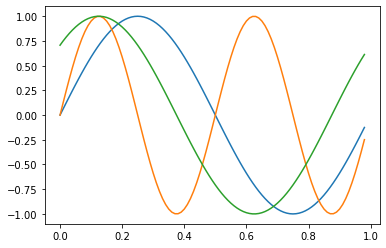

In [10]:
sns.lineplot(x = t, y = sig_carrier_base)
sns.lineplot(x = t, y = sig_carrier_freq)
sns.lineplot(x = t, y = sig_carrier_phase)

In [11]:
sig_bin = np.array([])
sig_ask = np.array([])
sig_psk = np.array([])
sig_fsk = np.array([])


In [12]:
for i in range(1,bin_data_len):
    if bin_data[0][i] == 1:
        sig_bin = np.append(sig_bin, np.ones((1, sampl_per_bin)))
        sig_ask = np.append(sig_ask, sig_carrier_base)
        sig_psk = np.append(sig_psk, sig_carrier_base)
        sig_fsk = np.append(sig_fsk, sig_carrier_base)
        
    else:
        sig_bin = np.append(sig_bin, np.zeros((1, sampl_per_bin)))
        sig_ask = np.append(sig_ask, 0.5*sig_carrier_base)
        sig_psk = np.append(sig_psk, sig_carrier_phase)
        sig_fsk = np.append(sig_fsk, sig_carrier_freq)        

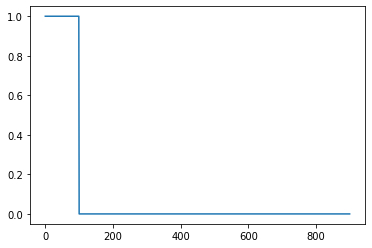

In [13]:
plt.plot(sig_bin)

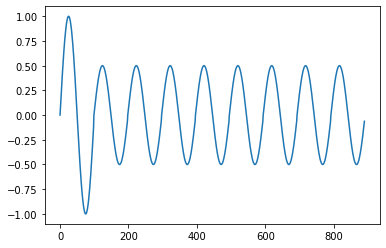

In [14]:
plt.plot(sig_ask)

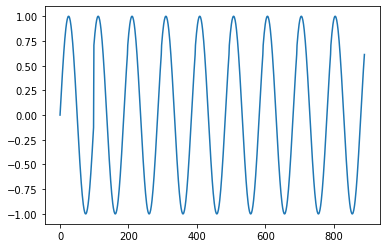

In [15]:
plt.plot(sig_psk)

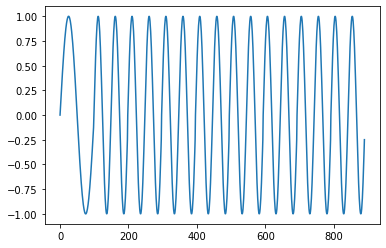

In [16]:
plt.plot(sig_fsk)

## Enconding

In [17]:
lenBits = 10000

bin1 = np.round(np.random.rand(1,lenBits))
bin2 = np.round(0.5*np.random.rand(1,lenBits)+0.45)


In [18]:
enc_bin1 = np.array([])
enc_bin2 = np.array([])

for i in range(0,lenBits):
    if bin1[0][i] == 1.0:
        if i == 0:
            enc_bin1 = np.append(enc_bin1, [1])
        else:
            enc_bin1[-1] = enc_bin1[-1] + 1
    else:
        enc_bin1 = np.append(enc_bin1, [0])
        
    if bin2[0][i] == 1.0:
        if i == 0:
            enc_bin2 = np.append(enc_bin2, [1])
        else:
            enc_bin2[-1] = enc_bin2[-1] + 1
    else:
        enc_bin2 = np.append(enc_bin2, [0])

In [19]:
ind1 = np.nonzero(enc_bin1)
ind2 = np.nonzero(enc_bin2)

In [20]:
argmax1 = np.argmax(enc_bin1[ind1])
max1 = np.max(enc_bin1[ind1])
argmax2 = np.argmax(enc_bin2[ind2])
max2 = np.max(enc_bin2[ind2])

# QAM signal

In [21]:
N_samp = 1000
N_symb = 10
fc = 1/10

In [22]:
chI = 2*np.round(np.random.rand(1,N_symb))-1
chQ = 2*np.round(np.random.rand(1,N_symb))-1

samp_I = np.array([])
samp_Q = np.array([])

In [23]:
for ind in range(0,N_symb):
    samp_I = np.append(samp_I, chI[0][ind]*np.ones(N_samp))
    samp_Q = np.append(samp_Q, chQ[0][ind]*np.ones(N_samp))

In [24]:
tx_signal = samp_I*np.cos(2*np.pi*fc*np.arange(1,len(samp_I)+1)) + samp_Q*np.sin(2*np.pi*fc*np.arange(1,len(samp_Q)+1))
sig_I_unfilt = tx_signal*np.cos(2*np.pi*fc*np.arange(1,len(samp_I)+1))
sig_Q_unfilt = tx_signal*np.sin(2*np.pi*fc*np.arange(1,len(samp_Q)+1))
numerator_coeffs, denominator_coeffs = signal.butter(4, fc, 'low')
sig_Q_filt = 2*signal.lfilter(numerator_coeffs, denominator_coeffs, sig_Q_unfilt)
sig_I_filt = 2*signal.lfilter(numerator_coeffs, denominator_coeffs, sig_I_unfilt)
recQ = np.round(sig_Q_filt[np.arange(N_samp/2,len(sig_Q_filt),np.round(N_samp)).astype(int)])
recI = np.round(sig_I_filt[np.arange(N_samp/2,len(sig_I_filt),np.round(N_samp)).astype(int)])

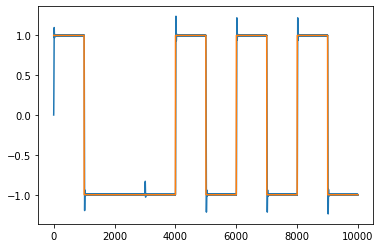

In [25]:
plt.plot(sig_I_filt)
plt.plot(samp_I)


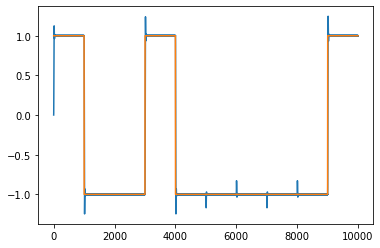

In [26]:
plt.plot(sig_Q_filt)
plt.plot(samp_Q)


## PLL Try

In [47]:
fs = 1000
ts = 1/fs
t = np.arange(0,1,ts)
f = 10
phase = np.pi/2
sig = np.cos(2*np.pi*f*t+phase)
local_osc = np.cos(2*np.pi*f*t)

In [48]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


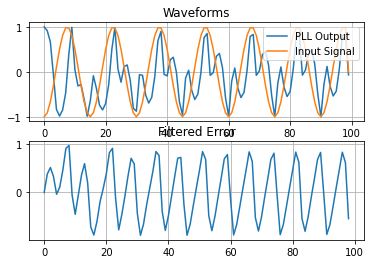

In [52]:
k = 1
N = 15
K_p = 0.2667
K_i = 0.0178
K_0 = 1

input_signal = np.zeros(100)

integrator_out = 0
phase_estimate = np.zeros(100)
e_D = [] #phase-error output
e_F = [] #loop filter output
sin_out = np.zeros(100)
cos_out = np.ones(100)

for n in range(99):
    input_signal[n] = np.cos(2*np.pi*(k/N)*n + np.pi)

    # phase detector
    try:
        e_D.append(input_signal[n] * sin_out[n])
    except IndexError:
        e_D.append(0)


    #loop filter
    integrator_out += K_i * e_D[n]
    e_F.append(K_p * e_D[n] + integrator_out)


    #NCO
    try: 
        phase_estimate[n+1] = phase_estimate[n] + K_0 * e_F[n]
    except IndexError:
        phase_estimate[n+1] = K_0 * e_F[n]

    sin_out[n+1] = -np.sin(2*np.pi*(k/N)*(n+1) + phase_estimate[n])
    cos_out[n+1] = np.cos(2*np.pi*(k/N)*(n+1) + phase_estimate[n])



# Create a Figure
fig = plt.figure()

# Set up Axes
ax1 = fig.add_subplot(211)
ax1.plot(cos_out, label='PLL Output')
plt.grid()
ax1.plot(input_signal, label='Input Signal')
plt.legend()
ax1.set_title('Waveforms')

# Show the plot
#plt.show()

ax2 = fig.add_subplot(212)
ax2.plot(e_F)
plt.grid()
ax2.set_title('Filtered Error')
plt.show()


In [53]:
butter_lowpass_filter(new, 15, fs, 5)

TypeError: can't multiply sequence by non-int of type 'float'

In [64]:
def function(m, a, s):
    m = str(m)
    ano = int(m[0:2])
    sem = int(m[2:4])
    ano_sem = ano*2
    semestres = ano_sem+sem
    a = a - 2000
    a_semestres = a*2 + s
    semestres_aluno = a_semestres- semestres
    print(semestres_aluno)
    

In [66]:
function(18013423,2020,0)

3
